<br><br><br>
<span style="color:red;font-size:60px">Ensemble Learning</span>
<br><br>

<li><span style="color:blue">Ensemble learning</span> is a methodology in which multiple different models are trained by an ML algorithm and the results are combined for prediction</li>
<li>Because the learning algorithm builds multiple models, ensemble methods are thought to be less likely to overfit the data</li>



<h2>Tree based ensemble methods</h2>
<li>Build multiple decision trees; each tree makes a prediction; the predictions are combined (often by voting) to make a single prediction</li>
<li><span style="color:blue">random forests</span> each tree is built using a subset of the <b>features</b>; each tree can make a prediction; the prediction from the most number of trees wins (classification) or the average prediction across all trees is the model prediction (regression)</li>
<li><span style="color:blue">bagging</span> each tree is built using a subset of the <b>data</b>; each tree can make a prediction; the prediction from the most number of trees wins (classification) or the average prediction across all trees is the model prediction (regression)</li>
<li>Most random forest and bagging classifiers allow you to vary both (the features as well as the data subset)</li>
<li><span style="color:blue">gradient boosting</span> a methodology which builds an ensemble of trees, adding trees one at a time so as to improve the overall metric being used (minimizing a loss function)</li>
<p></p>


<span style="color:green;font-size:x-large">Classifying handwritten digits</span>
<li>classify the handwritten digits into one of 10 classes (0,1,2,3,4,5,6,7,8,9)</li>
<li>this is a <span style="color:blue">multinomial classification</span> problem</li>

<span style="color:green;font-size:x-large">data set-up</span>

In [5]:
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_openml
# mnist = fetch_openml('mnist_784')

# X,y = mnist['data'],mnist['target']
# df = pd.DataFrame(np.append(X,np.array(y).reshape(len(X),1),axis=1))

# from sklearn.model_selection import train_test_split
# train, test = train_test_split(df, test_size = 0.3)
# x_train_mnist = train.iloc[0:,0:783]
# y_train_mnist = train[[784]]
# x_test_mnist = test.iloc[0:,0:783]
# y_test_mnist = test[[784]]

<p></p>
<span style="color:green;font-size:x-large">Baseline model: decision tree </span>
<li>we have ten possible classes that each digit can fall into</li>
<li>and 784 input features</li>
<li>fit a decision tree classifier to the data</li>

In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

clf = tree.DecisionTreeClassifier(max_depth = 4)
clf.fit(x_train_mnist,y_train_mnist)

DecisionTreeClassifier(max_depth=4)

<p></p>
<span style="color:green;font-size:x-large">evaluating the multinomial classifier</span>
<p></p>
<li>Eyeball test</li>
<li>accuracy</li>
<li>confusion matrix</li>

<p></p>
<span style="color:green;font-size:x-large">prediction probabilities</span>
<li>each case is assigned an array of probabilities</li>
<li>the probability that a case is a 0, 1, 2, etc.</li>
<li>the model uses the highest probability for the prediction</li>
<li>the sklearn function <span style="color:blue">predict_proba</span> returns the probabilities</li>
<li>Let's eyeball a few predictions</li>

In [3]:
pred_probs = clf.predict_proba(x_train_mnist.iloc[:10,:]) #Return the probabilities for the first n cases
[(clf.classes_[np.argmax(pred_probs[i])], #clf.classes returns the class for each prediction 
  y_train_mnist.iloc[i][784]) #The actual value
 for i in range(len(pred_probs))]

[('2', '2'),
 ('2', '8'),
 ('8', '8'),
 ('6', '6'),
 ('9', '5'),
 ('9', '9'),
 ('7', '7'),
 ('7', '7'),
 ('5', '5'),
 ('8', '8')]

In [4]:
print("Training score",clf.score(x_train_mnist,y_train_mnist))
print("Testing score",clf.score(x_test_mnist,y_test_mnist))

Training score 0.600326530612245
Testing score 0.6012857142857143


<span style="color:green;font-size:x-large">confusion matrix</span>
<li>N x N matrix of actuals vs. predicted</li>
<li>rows are actual, columns are predicted</li>
<li>$ C_{i,j} $ contains the number of cases that are in class i but predicted to be in class j</li>


In [5]:
from sklearn.metrics import confusion_matrix
p_test=clf.predict(x_test_mnist)

cm = confusion_matrix(np.array(y_test_mnist),p_test,labels=clf.classes_)
print(cm)




[[1607    0   64   26    8   22   53  177   37  162]
 [   4 1911  124   74    0    7   43   16  134    5]
 [  46   77 1441   15   58    4  140  107  124   58]
 [  42   15  129 1302   11   45   37   38  198  269]
 [   1   15   28   29 1305   19  121  124  104  346]
 [ 104   15   90  215  104  343  410   28  177  384]
 [  71   32  223   11  348   62  984   39  124  203]
 [   4   14  185   18   95    6   63 1597   54  168]
 [   9  116  227   32   19   49  575    5  722  307]
 [  10    8   29   69   68   26  102  150  169 1415]]


<span style="color:green;font-size:x-large">Convert everything to percents</span>
<p></p>
<li>Easier to eyeball performance</li>
<li>The diagonal elements give the accuracy of the model for each digit</li>

In [6]:
pct_cm = cm/(cm.sum(axis=1))*100
np.set_printoptions(precision=2,suppress=True,floatmode="fixed")
print(pct_cm)

[[74.54  0.00  3.09  1.25  0.38  1.18  2.53  8.03  1.80  7.92]
 [ 0.19 82.44  5.99  3.55  0.00  0.37  2.05  0.73  6.50  0.24]
 [ 2.13  3.32 69.61  0.72  2.77  0.21  6.68  4.85  6.02  2.83]
 [ 1.95  0.65  6.23 62.42  0.53  2.41  1.76  1.72  9.61 13.15]
 [ 0.05  0.65  1.35  1.39 62.38  1.02  5.77  5.63  5.05 16.91]
 [ 4.82  0.65  4.35 10.31  4.97 18.34 19.55  1.27  8.59 18.77]
 [ 3.29  1.38 10.77  0.53 16.63  3.32 46.92  1.77  6.02  9.92]
 [ 0.19  0.60  8.94  0.86  4.54  0.32  3.00 72.46  2.62  8.21]
 [ 0.42  5.00 10.97  1.53  0.91  2.62 27.42  0.23 35.03 15.00]
 [ 0.46  0.35  1.40  3.31  3.25  1.39  4.86  6.81  8.20 69.16]]


<h3>Recall</h3>

In [7]:
#Diagonal elements only
for i in range(len(pct_cm)):
    print("Digit: %d\tRecall: %1.2f"%(i,pct_cm[i,i]))

Digit: 0	Recall: 74.54
Digit: 1	Recall: 82.44
Digit: 2	Recall: 69.61
Digit: 3	Recall: 62.42
Digit: 4	Recall: 62.38
Digit: 5	Recall: 18.34
Digit: 6	Recall: 46.92
Digit: 7	Recall: 72.46
Digit: 8	Recall: 35.03
Digit: 9	Recall: 69.16


<h3>precision</h3>

In [8]:
from sklearn.metrics import precision_score
precision_score(y_test_mnist,clf.predict(x_test_mnist),average="weighted")

0.620044417901999

<h3>ROC AUC</h3>
<li>OVR: one versus rest computes roc curves and auc curves by creating binary values (e.g., 8 vs not 8) for each class</li>
<li>The function below draws the ROC curve and reports AUC for each class and also draws an ROC curve and reports AUC for the average values</li>
<li>I'm not going to explain the function code, just use it if you ever need to d a multiclass ROC/AUC analysis!</li>

In [9]:
def draw_multiclass_roc_auc(clf,y_actual,X,class_names,title=""):
    from sklearn.preprocessing import LabelBinarizer
    from sklearn.metrics import roc_curve, auc, RocCurveDisplay
    from itertools import cycle
    import matplotlib.pyplot as plt

    n_classes = len(class_names)
    #One hot encode the y

    label_binarizer = LabelBinarizer().fit(y_actual)
    y_onehot_test = label_binarizer.transform(y_actual)
    
    #Use predict_proba to get y score
    y_score = clf.predict_proba(X)
    
    # store the fpr, tpr, and roc_auc for all averaging strategies
    fpr, tpr, roc_auc = dict(), dict(), dict()
    
    # Compute micro-average ROC and AUC
    fpr["micro"], tpr["micro"], _ = roc_curve(y_onehot_test.ravel(), y_score.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_onehot_test[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    fpr_grid = np.linspace(0.0, 1.0, 1000)

    # Interpolate all ROC curves at these points
    mean_tpr = np.zeros_like(fpr_grid)

    for i in range(n_classes):
        mean_tpr += np.interp(fpr_grid, fpr[i], tpr[i])  # linear interpolation

    # Average it and compute AUC
    mean_tpr /= n_classes

    
    fig, ax = plt.subplots(figsize=(12, 12))

    plt.plot(
        fpr["micro"],
        tpr["micro"],
        label=f"micro-average ROC curve (AUC = {roc_auc['micro']:.2f})",
        color="deeppink",
        linestyle=":",
        linewidth=4,
    )
    colors = cycle(["aqua", "darkorange", "cornflowerblue"])
    for class_id, color in zip(range(n_classes), colors):
        RocCurveDisplay.from_predictions(
            y_onehot_test[:, class_id],
            y_score[:, class_id],
            name=f"ROC curve for {class_names[class_id]}",
            color=color,
            ax=ax,
        )
    
    plt.plot([0, 1], [0, 1], "k--", label="ROC curve for chance level (AUC = 0.5)")
    plt.axis("square")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(title)
    plt.legend()
    plt.show()    



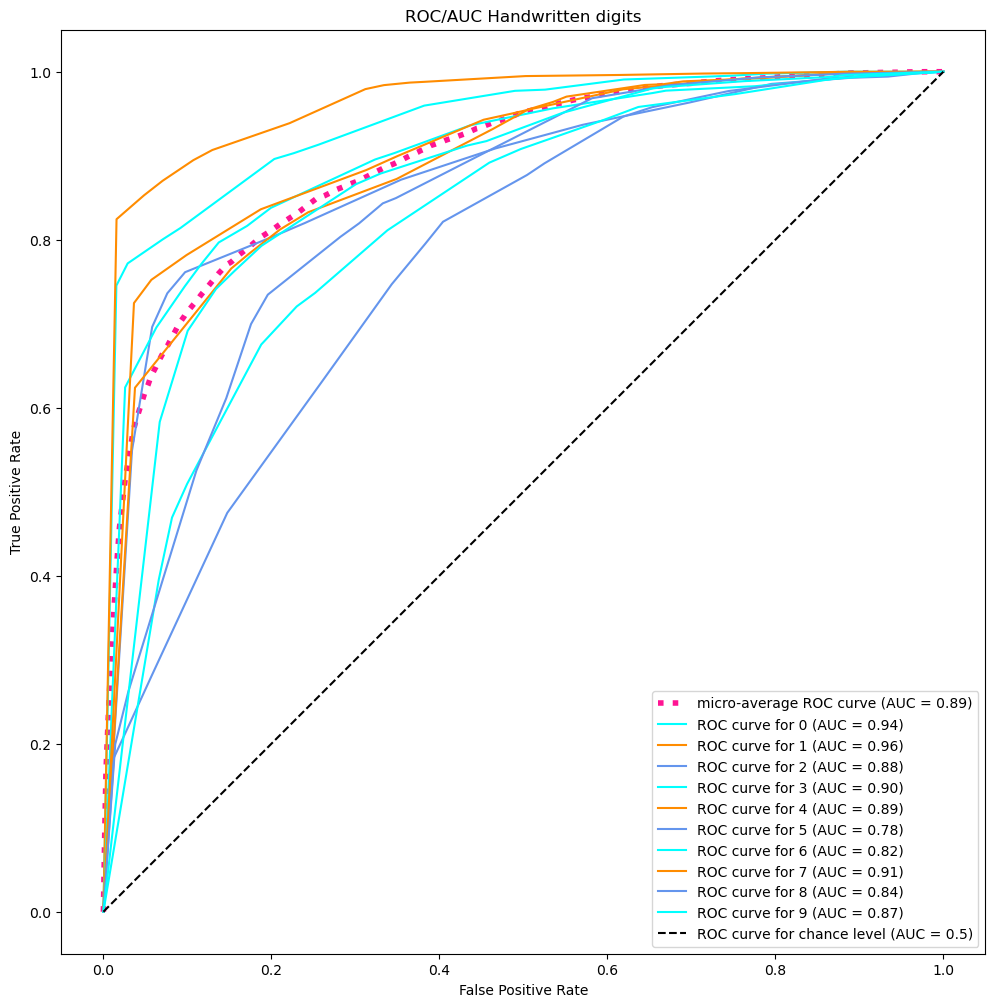

In [10]:
class_names = [str(i) for i in range(10)]   
title = "ROC/AUC Handwritten digits"
draw_multiclass_roc_auc(clf,y_test_mnist,x_test_mnist,class_names,title)

<span style="color:green;font-size:x-large">In summary</span>
<li>The model has about a 60% accuracy (not bad but probably not good enough)</li>
<li>It does better on some digits and not so good on others</li>
<li>Next, we'll see if we can improve on this with the random forest model</li>

<br><br><br>
<h2 style="color:red;font-size:50px">Ensemble learning random forests</h2>
<br><br>


<li>Use a random subset of features and choose the feature to split on from this subset
    <ul>
        <li>Especially useful for our problem since we have so many features</li>
    </ul>
<li>Repeat the process, this gives multiple different trees (the ensemble)
<li>The model then predicts y values by letting the trees vote 
<ul>
<li>The forest is given a case
<li>Each tree decides which class the case belongs to
<li>Votes are tallied
<li>The highest vote wins
</ul>

In [11]:
from sklearn.ensemble import RandomForestClassifier

#n_estimators is the number of trees in the forest. We'll generate 10 trees that will vote on the classification
rf_clf = RandomForestClassifier(n_estimators=10)
#np.ravel flattens the pandas Series into an np array. That's what the classifier needs
rf_clf.fit(x_train_mnist,np.ravel(y_train_mnist))

RandomForestClassifier(n_estimators=10)

<span style="color:green;font-size:x-large">Accuracy and Precision</span>
<p></p>
<li>A dramatic improvement in accuracy and precision!</li>


In [12]:
print("train accuracy:", rf_clf.score(x_train_mnist,y_train_mnist))
print("test accuracy :", rf_clf.score(x_test_mnist,y_test_mnist))

train accuracy: 0.9991020408163265
test accuracy : 0.9431428571428572


In [13]:
from sklearn.metrics import precision_score
precision_score(y_test_mnist,rf_clf.predict(x_test_mnist),average="weighted")

0.9431162445927859

<br><br><br>
<span style="color:red;font-size:50px">Bagging</span>
<br><br>



<li><span style="color:blue">Bagging</span> in machine learning involves resampling subsets of the data to build a model</li>
<li>Create a synthetic dataset by drawing sample cases "with replacement"</li>
<li>Run the decision tree algorithm on this dataset</li>
<li>Repeat on a new synthetic datasets</li>
<li>Let the many trees vote on the class for each case</li>
<li>Bootstrapping is especially useful when there is missing data in the dataset</li>
<li>The sklearn model <a href="https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html">BaggingClassifier</a> provides bootstrapping for random forests</li>


In [14]:
from sklearn.ensemble import BaggingClassifier #for bootstrapping
bag_clf = BaggingClassifier()
bag_clf.fit(x_train_mnist,np.ravel(y_train_mnist))

BaggingClassifier()

<span style="color:green;font-size:x-large">Accuracy and Precision</span>

In [15]:
print("train accuracy:", bag_clf.score(x_train_mnist,y_train_mnist))
print("test accuracy :", bag_clf.score(x_test_mnist,y_test_mnist))

train accuracy: 0.9984897959183674
test accuracy : 0.9425714285714286


In [ ]:
from sklearn.metrics import precision_score
precision_score(y_test_mnist,bag_clf.predict(x_test_mnist),average="weighted")

<p></p>
<span style="color:green;font-size:x-large">Hyperparameters vs. model parameters</span>
<p></p>
<li>In machine learning, a <span style="color:blue">model parameter</span> is something that is estimated from the data by the model. These are what we're looking for when we train a model. For example, the coefficients of a regression equation (or the weights in a neural network) are model parameters. The split values in a decision tree are another example of a model parameters</li>
<li>In our random forest model, we decided to generate 10 trees using 28 (sqrt 784) features at a time. These two parameters, the 10 and the 28 are not what we're looking for in the model but are external to the model. The 10 and 28 cannot be estimated from the data but must be tuned externally. Parameters that are not estimated from the data but are external to it are known as <span style="color:blue">hyperparameters</span></li>
<li>So, how do we decide what hyperparameter values to use?</li>


<span style="color:green;font-size:x-large">Hyperparameter estimation through grid search</span>
<p></p>
<li>Note that the only change we made was to generate ten trees by randomly picking a set of features</li>
<li>But, how do we know "10" is a good number?</li>
<li>And there are <a href="https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html">many other hyperparameters</a> that can be set. What values should we give them?</li>
<li>The process of figuring out the right combination of hyperparameters is known as <span style="color:blue">hyperparameter tuning</span></li>
<li>To avoid the danger of overfitting, tuning is usually done by running many different combinations of hyperparameter values in a cross validation framework</li>
<li>sklearn provides <a href="https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html">GridSearcCV</a> to search through the hyperparameter space</li>


In [1]:
%%time
from sklearn.model_selection import GridSearchCV
parameters = { #Parameters are for the random forest classifier model
     'n_estimators':(30, 40), #the number of trees
     'max_samples':(0.25,0.5,0.75), #The maximum depth of any tree
    'max_features':(100,300)
    #'min_samples_leaf':(10,20,30),
    #'min_samples_split' : (40,50,60),
}

#For grid search, we'll use 3 fold CV, and use all available processors iRandomForestClassifierrallel (n_jobs=-1)
gs_clf = GridSearchCV(RandomForestClassifier(bootstrap=True),parameters,cv=3,n_jobs=-1)
gs_clf.fit(x_train_mnist, np.ravel(y_train_mnist))
gs_clf.best_score_, gs_clf.best_params_ #Best score is the mean CV score of the best estimator (model)

NameError: name 'RandomForestClassifier' is not defined

<span style="color:green;font-size:x-large">Evaluating the best model</span>
<p></p>
<li>The gridsearch best model used cross validation on the training dataset</li>
<li>We can run the best model on the entire training dataset and test it against the testing dataset</li>

In [ ]:
b_model = RandomForestClassifier(n_estimators=40,max_samples=0.75,
                                max_features=100,bootstrap=True)
b_model.fit(x_train_mnist,np.ravel(y_train_mnist))

#Accuracy
print("train accuracy:", b_model.score(x_train_mnist,y_train_mnist))
print("test accuracy :", b_model.score(x_test_mnist,y_test_mnist))

#Precision
from sklearn.metrics import precision_score
precision_score(y_test_mnist,b_model.predict(x_test_mnist),average="weighted")


<h3>Example for the bagging classifier</h3>
<li>DON'T RUN THIS. IT TAKES A LONG TIME!</li>

In [ ]:
%%time
from sklearn.model_selection import GridSearchCV
parameters = { #Parameters are for the random forest classifier model
     'n_estimators':(30, 40), #the number of trees
     'max_samples':(0.25,0.5,0.75), #The maximum depth of any tree
    'max_features':(100,300)
    ''
}

#For grid search, we'll use 3 fold CV, and use all available processors in parallel (n_jobs=-1)
gs_clf = GridSearchCV(BaggingClassifier(),parameters,cv=3,n_jobs=-1)
gs_clf.fit(x_train_mnist, np.ravel(y_train_mnist))
gs_clf.best_score_, gs_clf.best_params_ #Best score is the mean CV score of the best estimator (model)

<br><br><br>
<span style="color:red;font-size:50px">Gradient Boosting</span>
<br><br>


In gradient boosting, the algorithm starts with a randomly generated tree that predicts the y values and then iteratively generates trees that predict the error 

A simplistic explanation is as follows:
<li>set metaparameters (num features and sample size)</li>
<li>build a tree (using the feature subset and sample subset)</li>
<li>for that tree, compute the error for each case in the sample (or for another random sample)</li>
<li>we now have data in the format (independent features, prediction error)</li>
<li>build a tree that predicts the prediction error (after applying a regularization factor to reduce overfitting)</li>
<li>combine the original tree and the error predicting tree (after applying a second "error correcting factor"</li>
<li>this combination gives us prediction model 1</li>
<li>recalculate errors and build a new error prediction tree</li>
<li>combine with model1 to give model 2</li>
<li>Do this for n iterations</li>


<img src="gradient boosting.png">

<li>Gradient boosting is computationally expensive but, in most cases, gives better results</li>

In [2]:
from sklearn.ensemble import GradientBoostingClassifier

g_clf = GradientBoostingClassifier(n_estimators=40,
                                  max_features=100,
                                  subsample=0.75)

g_clf.fit(x_train_mnist, np.ravel(y_train_mnist))

: 

: 

In [ ]:
#Accuracy
print("train accuracy:", g_clf.score(x_train_mnist,y_train_mnist))
print("test accuracy :", g_clf.score(x_test_mnist,y_test_mnist))

#Precision
from sklearn.metrics import precision_score
precision_score(y_test_mnist,g_clf.predict(x_test_mnist),average="weighted")


In [ ]:
%%time
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
parameters = {
     'n_estimators':(30, 100), #the number of trees
     'subsample':(.2,.5,.75),
     'max_features':(100,200, 400)
     #'oob_score':np.ravel(y_test)
     
}

model = GridSearchCV(GradientBoostingClassifier(),parameters,cv=3,n_jobs=-1)
model.fit(x_train_mnist, np.ravel(y_train_mnist))
model.best_score_, model.best_params_

In [ ]:
%%time
from sklearn.ensemble import GradientBoostingClassifier

b_g_clf = GradientBoostingClassifier(n_estimators=100,
                                  max_features=100,
                                  subsample=0.75)

b_g_clf.fit(x_train_mnist, np.ravel(y_train_mnist))

In [ ]:
#Accuracy
print("train accuracy:", b_g_clf.score(x_train_mnist,y_train_mnist))
print("test accuracy :", b_g_clf.score(x_test_mnist,y_test_mnist))

#Precision
from sklearn.metrics import precision_score
precision_score(y_test_mnist,b_g_clf.predict(x_test_mnist),average="weighted")


<span style="color:green;font-size:xx-large">Feature importance</span>
<p></p>
<li>Since ensemble methods are picking different features in different trees, they can provide us with an estimate of feature importance</li>
<li>For each feature, the model calculates by how much entropy decreases (net across levels) by selecting it</li>

<li>the digit recognition features are not informative so we'll use our wine example to examine feature importance</li>

In [2]:
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
import pandas as pd
from pandas import DataFrame
w_df = pd.read_csv(url,header=0,sep=';')


In [3]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(w_df, test_size = 0.3)
x_train_wine = train.iloc[0:,0:11]
y_train_wine = train[['quality']]
x_test_wine = test.iloc[0:,0:11]
y_test_wine = test[['quality']]




In [6]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(max_depth=5)
rf_model.fit(x_train_wine,np.ravel(y_train_wine))

RandomForestRegressor(max_depth=5)

In [7]:
rf_model.score(x_train_wine,y_train_wine)

0.5668620345667765

In [8]:
rf_model.score(x_test_wine,y_test_wine)

0.3897010532244918

<span style="color:green;font-size:large">plotting relative importance of features</span>

In [9]:
rf_model.feature_importances_

array([0.03575249, 0.14871932, 0.02276057, 0.02328237, 0.03062768,
       0.02403763, 0.05493963, 0.02821763, 0.02650682, 0.17573206,
       0.4294238 ])

Text(0.5, 0, 'Relative Importance')

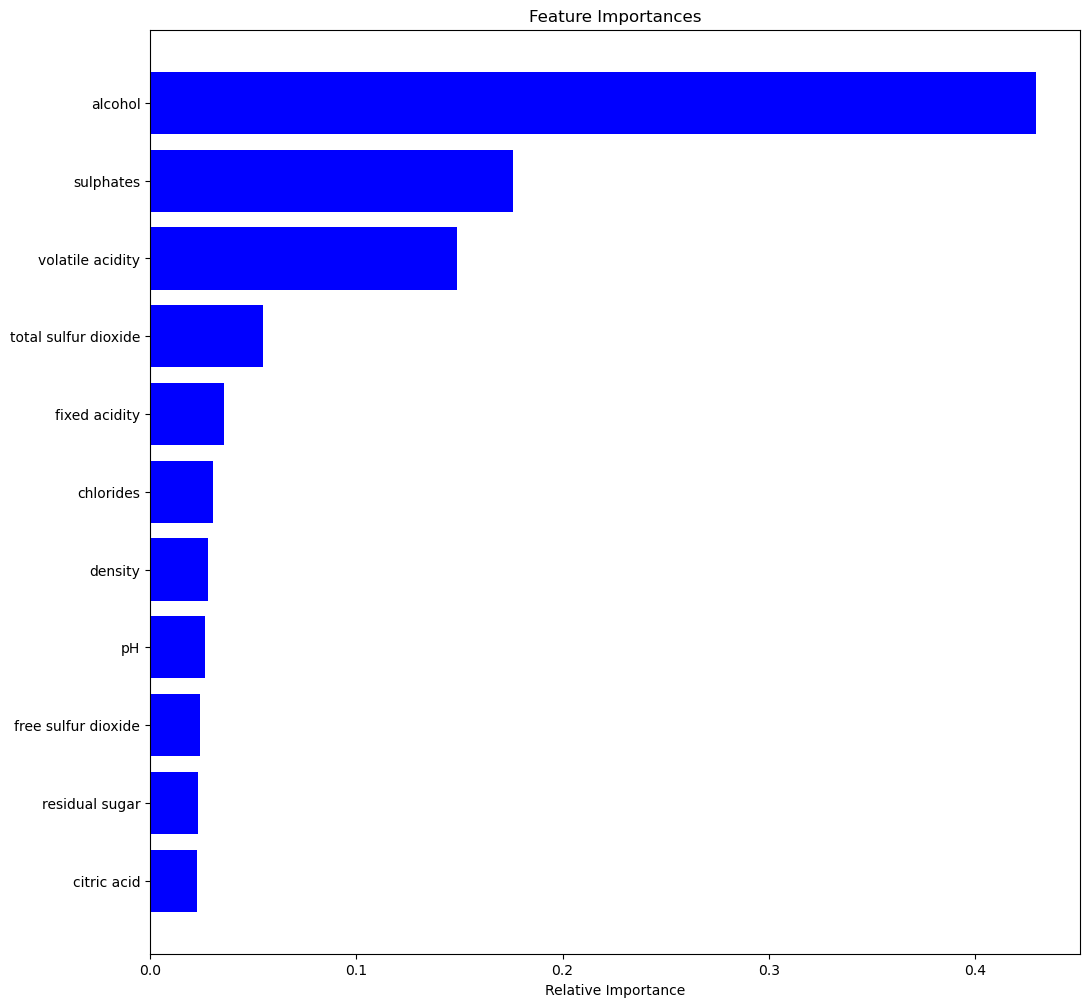

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
labels = x_train_wine.columns
importances = rf_model.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices],  color='b', align='center')
plt.yticks(range(len(indices)),labels[indices])

plt.xlabel('Relative Importance')

